In [1]:
%matplotlib inline

from complex_opinion.core import Opinion_Model

import networkx as nx

import joblib

import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# Generate Watts-Strogatz network

N = 500
k = 5
p = 0.01
G = nx.watts_strogatz_graph( N , k , p , seed = 896803 )

In [3]:
# instance the Opinion_Model class

m = Opinion_Model(G)

In [8]:
# ------------- Declare model parameters -------------

# seed = np.random.randint( 2 ** ( 4 * 7 ))  # original Mahdi
seed = 2 ** ( 4 * 3 ) - 1  # quiero que sea siempre la misma

number_of_initial_conditions = 1 # 50
# we will average the evolutions over the initial conditions

num_sim_per_in_cond = 1000
# number of simulations for each initial condition
# that we want to average

num_MC_steps = 10000

H = 0.2    # campo
T = 0.2    # temperatura
p_1 = 1.0  # probabilidad de contagio


In [9]:
# ------------- Model Evolution -------------

t , M1 = m.opinion_dynamics(number_of_initial_conditions, num_sim_per_in_cond, num_MC_steps, H, T, p_1, seed)

In [10]:
# path = "/home/nate/Devel/2complex_opinion/examples/Mahdi_data"

# mh = open(path, "rb")
# M2 = joblib.load(mh)  # mahdi_simulation
# M2 = np.array(M2)

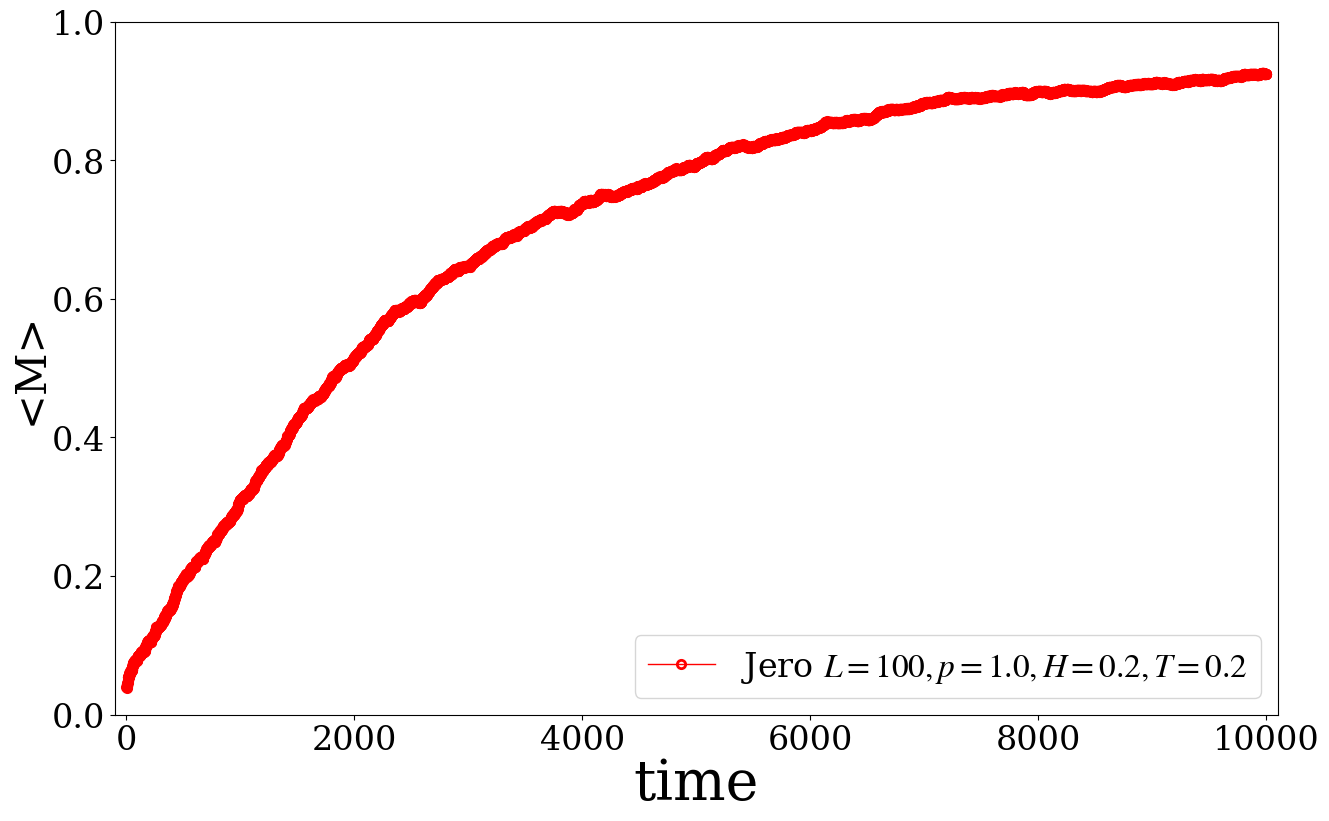

In [11]:
# ------------- Ploteo ----------------------

plt.rcParams["figure.figsize"] = [15,9]
plt.rcParams['font.size'] = '24'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rc('xtick', labelsize='x-small')
#plt.rc('ytick', labelsize='x-small')

plt.xlabel( 'time' , fontsize=40, labelpad=0 )
plt.ylabel( r'<M>' , fontsize=30, labelpad=0)

plt.xlim([-100., 10100])
plt.ylim([0, 1.0])

plt.plot(t[:],M1[:],'ro', label= r'Jero $L=100, p=1.0, H=0.2, T=0.2$', linestyle='-', linewidth=1, markersize=6,mew=2, mfc='none')

# plt.plot(t[:],M2[:],'bo', label= r'Mahdi $L=100, p=1.0, H=0.2, T=0.2$', linestyle='-', linewidth=1, markersize=6,mew=2, mfc='none')

plt.legend(loc='lower right')

plt.savefig("M-vs-Time.pdf", facecolor='white', edgecolor='none')